# Review Session 3 - Part 1: Networks

Linear algebra and complexity variables

Course: Tools of Economic Complexity

**Outline**

- Linear algebra basics
- Networks - construction and metrics
	- Adjacency matrix
	- Edge lists
	- Centrality metrics
	- “Network backboning” - Michele / Frank
    - Degree distributions (exercise)
- Complexity metrics
	- ECI / PCI / Density
	- Industry spaces - co-production / co-location / co-coordination
    - Predicting product appearances
    - Backing out country CCA's
- Density regressions
	- Growth vs density
	- Product appearances vs density
- Growth regressions
    - Growth vs ECI etc. (exercise)

In [ ]:
%reset -f

In [ ]:
# Helps while coding up modules to import
%reload_ext autoreload
%autoreload 2

In [2]:
# # Uncomment this on Google Colab
!pip install python-igraph networkx

     |████████████████████████████████| 3.2 MB 5.0 MB/s 


In [3]:
# Basics
import os
import re
import sys
from pathlib import Path

import igraph as ig

# Data and plotting
import matplotlib.pyplot as plt

# Networks
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

# New Section

In [ ]:
# Set file paths
PROJ = Path(os.path.realpath("."))
ROOT = PROJ.parent
DATA = ROOT / "data/"

In [ ]:
# Import additional custom modules
sys.path.append(str(PROJ))
sys.path.append(str(ROOT / "src"))

In [ ]:
# # Do this instead on Colab
# !wget https://raw.githubusercontent.com/shreyasgm/gl_complexity_review/main/src/network_backboning.py -P local_modules -nc
# sys.path.append("local_modules")

In [ ]:
from network_backboning import *

# Linear Algebra Basics

Great tutorial [here](https://cs231n.github.io/python-numpy-tutorial/)

## Arrays, matrices, and indexing

In [ ]:
# Create a matrix and a vector(?)
M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
v = np.array([[1], [2], [3]])

In [ ]:
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
v

array([[1],
       [2],
       [3]])

In [ ]:
print(f"Sum: {M.sum()}")
print(f"Sum horizontally (across columns): {M.sum(axis=1)}")
print(f"Sum vertically (across rows): {M.sum(axis=0)}")

Sum: 45
Sum horizontally (across columns): [ 6 15 24]
Sum vertically (across rows): [12 15 18]


In [ ]:
M.shape

(3, 3)

In [ ]:
v.shape

(3, 1)

In [ ]:
v.ndim

2

In [ ]:
np.array([1, 2, 3]).shape

(3,)

In [ ]:
np.ones((2, 4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [ ]:
np.diag([1, 2, 3, 4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [ ]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Indexing: selecting elements of list / arrays / matrices based on their positions

In [ ]:
test_list = ["a", "b", "c", "d", "e"]
test_list[3:5]

['d', 'e']

In [ ]:
test_arr = np.array(range(100, 120))
test_arr

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119])

In [ ]:
test_arr[5:8]

array([105, 106, 107])

In [ ]:
test_mat = np.random.randint(30, 60, (5, 5))
test_mat

array([[56, 43, 30, 43, 58],
       [31, 58, 52, 40, 45],
       [41, 45, 53, 34, 43],
       [54, 49, 51, 38, 36],
       [55, 42, 53, 52, 38]])

In [ ]:
test_mat[:3, 1:3]

array([[43, 30],
       [58, 52],
       [45, 53]])

## Broadcasting

In [ ]:
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
v = np.array([1, 0, 1])

In [ ]:
x

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [ ]:
v

array([1, 0, 1])

In [ ]:
x + v

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

## Matrix multiplication

$A \cdot B$

$A \times B$

In [ ]:
# Create two random matrices
A = np.random.randint(0, 5, (4, 3))
B = np.random.randint(0, 6, (2, 3))

In [ ]:
# Dot product
try:
    print("Trying dot product")
    print(A @ B)
except Exception as e:
    print(e)
    print("Oops")
    print(A @ B.T)

Trying dot product
matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)
Oops
[[15 12]
 [10 16]
 [15 11]
 [ 0  4]]


In [ ]:
# Dot product
np.array_equal(A @ B.T, A.dot(B.T))

True

In [ ]:
# Cross product
np.cross([1, 2, 3], [8, 5, 6])

array([ -3,  18, -11])

In [ ]:
# Element-wise
A * np.eye(A.shape[0], A.shape[1])

array([[0., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.],
       [0., 0., 0.]])

## Eigenvectors

In [ ]:
# Eigenvalues / vectors
eigval, eigvec = np.linalg.eig(np.random.randint(0, 5, (3, 3)))

In [ ]:
eigval

array([ 9.29420244, -0.15057759, -2.14362484])

In [ ]:
eigvec

array([[-0.55260029, -0.78031529,  0.42828166],
       [-0.47354263,  0.24340776, -0.89011208],
       [-0.68585006,  0.57607353,  0.15580534]])

# Networks

[Alternatives to networkx](https://www.timlrx.com/blog/benchmark-of-popular-graph-network-packages) - igraph (somewhat fast, very stable), graph-tool (very fast, not as stable), networkit

## Basics

In [ ]:
# Proximities from the atlas
proxurl = (
    "http://intl-atlas-downloads.s3.amazonaws.com/atlas_2_16_6/hs92_proximities.csv"
)
proxdf = pd.read_csv(
    proxurl, dtype={"commoditycode_1": str, "commoditycode_2": str, "proximity": float}
)
proxdf.head()

,commoditycode_1,commoditycode_2,proximity
0,0101,0101,0.000000
1,0101,0102,0.277778
2,0101,0103,0.352941
3,0101,0104,0.260870
4,0101,0105,0.296296


In [ ]:
# Prepare node attributes

# Read HS product codes
hsurl = "http://intl-atlas-downloads.s3.amazonaws.com/17.0/hs_product.zip"
hsdf = pd.read_csv(hsurl, compression="zip", dtype="str")
# Only keep products present in proximity matrix
nodedf = (
    hsdf[hsdf.hs_product_code.isin(proxdf.commoditycode_1)][
        ["hs_product_code", "hs_product_name_short_en"]
    ]
    .sort_values("hs_product_code")
    .reset_index(drop=True)
)
nodedf.head()

,hs_product_code,hs_product_name_short_en
0,0101,Horses
1,0102,Bovine
2,0103,Swine
3,0104,Sheep
4,0105,Fowl


In [ ]:
# Create network
product_nw = nx.from_pandas_edgelist(
    proxdf, source="commoditycode_1", target="commoditycode_2", edge_attr=True
)
# Set node attributes
nx.set_node_attributes(product_nw, nodedf.set_index("hs_product_code").to_dict("index"))

In [ ]:
product_nw.nodes["0101"]

{'hs_product_name_short_en': 'Horses'}

## Visualization

In [ ]:
def draw_network(
    nw,
    node_pos=None,
    node_color=None,
    node_size=None,
    edge_color=(0, 0, 0, 0.1),
    ax=None,
    figsize=(15, 15),
    **kwargs
):
    """
    Draw network using networkx

    Args:
        nw: networkx graph
        node_pos: node positions dictionary keyed by node
        node_color: "attr" indicates "color" node attribute holds colors
        node_size: "attr" indicates "size" node attribute holds sizes
        edge_color: edge colors, default is black

    """
    if node_color == "attr":
        node_color = nx.get_node_attributes(nw, "color")
    if node_size == "attr":
        node_size = nx.get_node_attributes(nw, "size")
    if ax is None:
        f, ax = plt.subplots(figsize=figsize)
    # Draw network
    ax = nx.draw_networkx(
        nw,
        pos=node_pos,
        with_labels=False,
        node_size=node_size,
        node_color=node_color,
        edge_color=edge_color,
        ax=ax,
        **kwargs
    )
    return ax

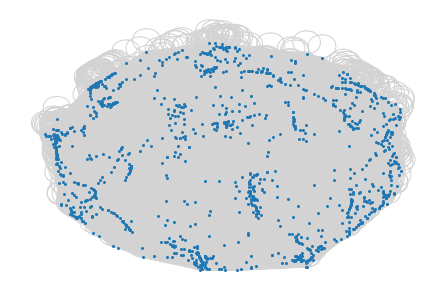

In [ ]:
# Visualize giant component
components = sorted(nx.connected_components(product_nw), key=len, reverse=True)
giant_component = product_nw.subgraph(components[0])
# Draw network
nx.draw(giant_component, node_size=4, edge_color="lightgrey")

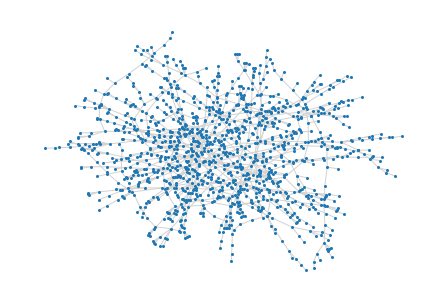

In [ ]:
# Visualize mst
mst = nx.maximum_spanning_tree(product_nw, weight="proximity")
# Draw network
nx.draw(mst, node_size=4, edge_color="lightgrey")

In [ ]:
# List available attributes
available_node_attributes = lambda g: set(
    [k for n in g.nodes for k in g.nodes[n].keys()]
)
available_edge_attributes = lambda g: set(
    [k for n in g.edges for k in g.edges[n].keys()]
)

In [ ]:
available_node_attributes(product_nw)

{'hs_product_name_short_en'}

In [ ]:
available_edge_attributes(product_nw)

{'proximity'}

## Backboning

In [ ]:
# Network backboning
g = giant_component
g_denoised = noise_correct_nw(g, weightcol="proximity", noise_correction_threshold=0.7)

In [ ]:
print(
    f"Number of edges goes from {g.number_of_edges()} to {g_denoised.number_of_edges()}"
)

Number of edges goes from 769420 to 24985


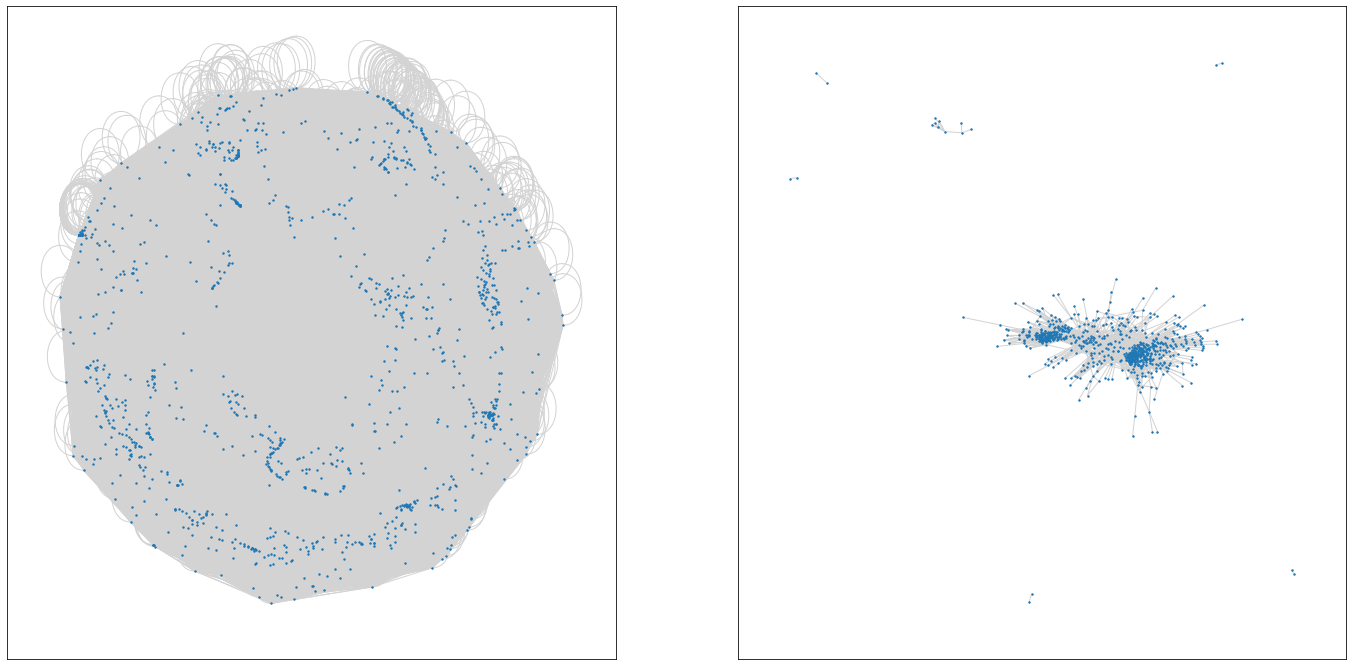

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 12))
# draw_network(g, node_size=2, edge_color="lightgrey", ax=ax1)
draw_network(g_denoised, node_size=2, edge_color="lightgrey", ax=ax2)

## Centrality Measures

In [ ]:
# Read product nodes
product_nw_nodes = (
    pd.DataFrame.from_dict(dict(g_denoised.nodes(data=True)), orient="index")
    .reset_index()
    .rename(columns={"index": "hs_product_code"})
)
product_nw_nodes.head()

,hs_product_code,hs_product_name_short_en
0,0101,Horses
1,0102,Bovine
2,0103,Swine
3,0104,Sheep
4,0105,Fowl


In [ ]:
# Convert to igraph for performance
product_ig = ig.Graph.from_networkx(g_denoised)

In [ ]:
%%time
# Calculate various centrality measures
product_nw_nodes["degree_centrality"] = product_ig.degree()
product_nw_nodes["eigenvector_centrality"] = product_ig.eigenvector_centrality()
product_nw_nodes["betweenness_centrality"] = product_ig.betweenness()
product_nw_nodes.head()

CPU times: user 477 ms, sys: 47.6 ms, total: 525 ms
Wall time: 344 ms


,hs_product_code,hs_product_name_short_en,degree_centrality,eigenvector_centrality,betweenness_centrality
0,0101,Horses,104,0.739971,104.661313
1,0102,Bovine,108,0.773384,193.974585
2,0103,Swine,86,0.573527,107.041280
3,0104,Sheep,115,0.800812,462.299519
4,0105,Fowl,89,0.642674,107.123706


In [ ]:
product_nw_nodes.sort_values("eigenvector_centrality", ascending=False).head(10)

,hs_product_code,hs_product_name_short_en,degree_centrality,eigenvector_centrality,betweenness_centrality
42,0510,Animal products used in pharmaceuticals,156,1.000000,1415.780520
21,0306,Crustaceans,145,0.963688,955.982484
39,0507,Whalebone & horns,147,0.951821,943.092318
22,0307,Molluscs,140,0.948828,641.761843
55,0708,Legumes,143,0.943869,903.469981
24,0402,"Milk, concentrated",142,0.942903,940.071064
18,0303,"Frozen fish, excluding fillets",135,0.942476,752.161211
60,0713,"Legumes, dried",145,0.941199,1107.748458
50,0703,"Onions, shallots, garlic",134,0.936290,397.389892
46,0603,Cut flowers,147,0.933801,1775.922733


In [ ]:
product_nw_nodes.sort_values("eigenvector_centrality", ascending=False).tail(10)

,hs_product_code,hs_product_name_short_en,degree_centrality,eigenvector_centrality,betweenness_centrality
780,8402,Steam boilers,1,6.206831e-08,0.0
714,7504,Nickel powders,1,1.394775e-08,0.0
683,7229,Wire of other alloy steel,1,5.109719e-09,0.0
672,7209,"Flat-rolled iron, width > 600mm, cold-rolled, ...",1,5.109719e-09,0.0
685,7303,Tubes of cast iron,1,5.109719e-09,0.0
789,8429,"Self-propelled bulldozers, excavators and road...",1,7.673605e-21,0.0
792,8432,Machinery for soil preparation or cultivation,1,0.000000e+00,0.0
791,8431,Parts for use with hoists and excavation machi...,2,0.000000e+00,1.0
788,8427,Fork-lift trucks,1,0.000000e+00,0.0
793,8434,Dairy machinery,1,0.000000e+00,0.0


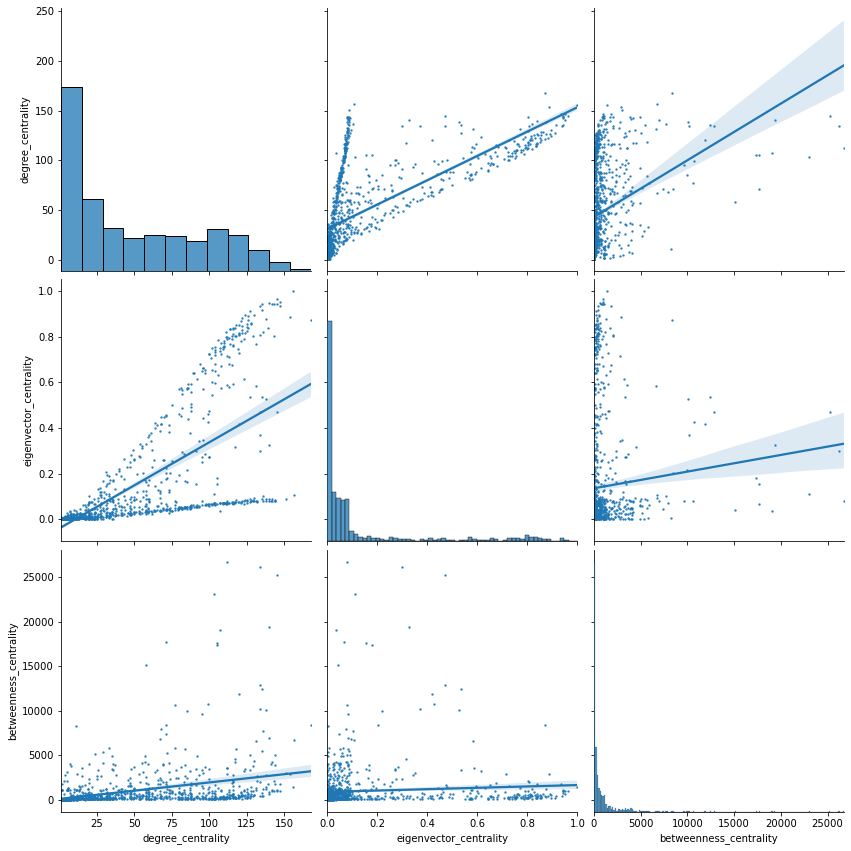

In [ ]:
g = sns.pairplot(
    product_nw_nodes, kind="reg", height=4, plot_kws=dict(scatter_kws=dict(s=2))
)